# CSC7700 Homework 1


### Due Feb. 18th, by end of day. 
### Do all your work on this notebook and submit your notebook by email to zhang@csc.lsu.edu 
### (Rename your notebook to Huasong.Shan.HW1.ipynb)


In [1]:

%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [2]:

import pandas as pd
from collections import Counter
import matplotlib
import numpy as np
import matplotlib.pyplot as pl
import numpy as np



## Prostate Cancer Dataset

Gene expression measurements for samples of prostate tumors and adjacent prostate tissue not containing tumor.

Platform: Affymetrix Human Genome U95Av2 Array

Diagnostic classes:
* normal tissue (normal): 50 examples (49.0%)
* prostate tumor (tumor): 52 examples (51.0%)

Number of genes: 12533 <br>
Number of samples: 102

In [9]:
import pandas as pd
data = pd.read_pickle('/home/hudson/Downloads/prostate.df')
data.head(2)

,t,31308_at,31309_r_at,31310_at,31311_at,31312_at,31313_at,31314_at,31315_at,31316_at,31317_r_at,31318_at,31319_at,31320_at,31321_at,31322_at,31323_r_at,31324_at,31325_at,31326_at,
0,-11.4,2.7,0.6,4.3,28,0.3,-17.5,-5.4,7.5,-0.9,176,-0.3,4.5,-56.200001,21.4,0,-5,94.900002,-22,-70.900002,...
1,-1.0,-1.0,0.0,-1.0,3,0.0,-3.0,1.0,-2.0,0.0,27,0.0,-1.0,-5.000000,6.0,1,-11,2.000000,-4,0.000000,...


In [10]:
y = data.values[:, -1]
print y.shape, Counter(y.tolist())
x = data.values[:, :-1]
print x.shape

(102,) Counter({'tumor': 52, 'normal': 50})
(102, 12533)


## Task 1

(You can use DecisionTree implementation from scikit-learn.) 

Try decision tree on the above dataset. consider different values for the max depth of the tree ('max_depth') and min number of samples required to be a leaf node ('min-samples_leaf'). Conduct 10-fold cross-validation and: 

    - plot training error and testing error v.s. tree depth
    - plot training error and testing error v.s. min. sample for leaf nodes
    
Error should be measured by percentage of misclassification (i.e., return 'normal' for 'tumor' and vice versa).    

In [11]:
from sklearn import tree
from sklearn import metrics
from sklearn.cross_validation import KFold
n_folds = 10
#10 fold cross-validation
kf = KFold(len(y), n_folds=n_folds)




In [12]:
# vary the depth of decision trees
max_depth = np.arange(1, 25)

avg_train_err = np.zeros(len(max_depth))
avg_test_err = np.zeros(len(max_depth))

for i, d in enumerate(max_depth):
    #print '\n',i,d
    train_errors = np.zeros(n_folds)
    test_errors = np.zeros(n_folds)
    index = 0
    for train_index, test_index in kf:
        #print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test = x[train_index], x[test_index]
        y_train, y_test = y[train_index], y[test_index]
        #print X_train.shape, X_test.shape, y_train.shape, y_test.shape        
        clf=tree.DecisionTreeClassifier(max_depth=d)
        clf.fit(X_train,y_train)
        train_errors[index] = metrics.accuracy_score(y_train,clf.predict(X_train))
        test_errors[index] = metrics.accuracy_score(y_test,clf.predict(X_test))
        index += 1
    avg_train_err[i] = np.mean(train_errors)
    avg_test_err[i] = np.mean(test_errors)

print avg_train_err
print avg_test_err

[ 0.90635452  0.98365982  1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.          1.
  1.          1.          1.        ]
[ 0.83636364  0.74545455  0.74636364  0.77454545  0.81727273  0.75636364
  0.80545455  0.79545455  0.80727273  0.75545455  0.72545455  0.72363636
  0.75545455  0.78636364  0.76545455  0.74818182  0.78636364  0.80454545
  0.76636364  0.77454545  0.79727273  0.79818182  0.82727273  0.81454545]


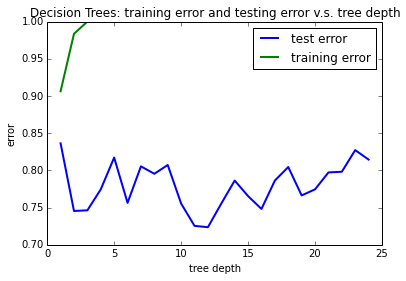

In [ ]:
plt.title('Decision Trees: training error and testing error v.s. tree depth')
pl.plot(max_depth, avg_test_err, lw=2, label = 'test error')
pl.plot(max_depth, avg_train_err, lw=2, label = 'training error')
pl.legend()
pl.xlabel('tree depth')
pl.ylabel('error')

pl.show()


In [ ]:
# vary the min. sample for leaf nodes of decision trees
n_x_samples = np.arange(1, 25)

avg_train_err = np.zeros(len(n_x_samples))
avg_test_err = np.zeros(len(n_x_samples))
for i, d in enumerate(n_x_samples):
    #print '\n',i,d
    train_errors = np.zeros(n_folds)
    test_errors = np.zeros(n_folds)
    index = 0
    for train_index, test_index in kf:
        #print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test = x[train_index], x[test_index]
        y_train, y_test = y[train_index], y[test_index]
        #print X_train.shape, X_test.shape, y_train.shape, y_test.shape        
        #clf=tree.DecisionTreeClassifier(max_depth=d)
        clf=tree.DecisionTreeClassifier(min_samples_leaf=d)
        clf.fit(X_train,y_train)
        train_errors[index] = metrics.accuracy_score(y_train,clf.predict(X_train))
        test_errors[index] = metrics.accuracy_score(y_test,clf.predict(X_test))
        index += 1
    avg_train_err[i] = np.mean(train_errors)
    avg_test_err[i] = np.mean(test_errors)

print avg_train_err
print avg_test_err

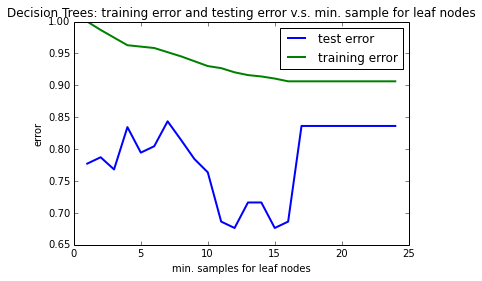

In [62]:
plt.title('Decision Trees: training error and testing error v.s. min. sample for leaf nodes')
pl.plot(max_depth, avg_test_err, lw=2, label = 'test error')
pl.plot(max_depth, avg_train_err, lw=2, label = 'training error')
pl.legend()
pl.xlabel('min. samples for leaf nodes')
pl.ylabel('error')

pl.show()

## Task 2

Implement 2-class logistic regression using theano. <br>
Use (stochastic) gradient descending to minimize negative loglikelihood of the data and obtain the value for the parameters. <br>
(You must use the probability as defined on the lecture notes.) <br>
(You cannot use any existing implementation of logistic regression or (stochastic) gradient descending. You must implement these yourself.)

    - plot negative loglikelihood v.s. iteration for your SGD.


Investigate how different starting values for the parameters affect the final negative loglikelihood. 

    - report the final neg. loglike. for 1) all parameters are initialized to be zero; 2) they are initialized to random values within a range of your choice.  

Conduct 10-fold cross-validation, 

    - report the training error and the test error. 
    
Add L1-regularization to your model, i.e., the optimization should minimize 

$$nll + c*\sum_i |W_i|$$

where nll is the neg. log likelihood and W is the parameter vector (except the bias). Try different values for c
and conduct 10-fold cross-validation. Plot:

    - number of non-zero parameters v.s. c
    - 10-fold cross-validation test error v.s. c 

In [4]:
import numpy
import pandas as pd
import matplotlib.pyplot as pl

import theano
import theano.tensor as T

data = pd.read_pickle('/home/hudson/experiments/prostate.df')

train_set_y = (data.values[:, -1] == 'tumor')
print train_set_y.shape
print train_set_y[-1]
train_set_x = data.values[:, :-1]
print train_set_x.shape
n_genes = train_set_x.shape[1]
print n_genes

train_set_x = train_set_x[:100].astype(float)
train_set_y = train_set_y[:100].astype(float).reshape((100,1))
batch_size = 20
n_batches = len(train_set_y)/batch_size
print (train_set_x)[0]
print (train_set_y)[0], (train_set_y)[-1]
print len(train_set_y), n_batches

train_set_x = theano.shared(value=train_set_x, name='tx', borrow=True)
train_set_y = theano.shared(value=train_set_y, name='ty', borrow=True)

(102,)
True
(102, 12533)
12533
[-11.39999962   2.70000005   0.60000002 ...,  19.29999924 -39.5
  37.29999924]
[ 0.] [ 1.]
100 5


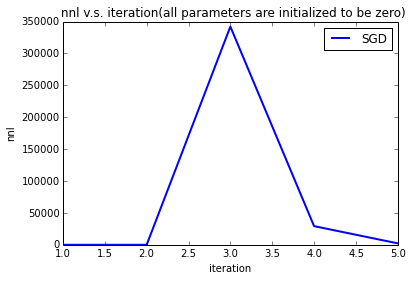

In [5]:
# all parameters are initialized to be zero; 
x = T.matrix("x")
y = T.matrix("y")

w = theano.shared(np.zeros((n_genes,1)), name="w")
#w = theano.shared(rng.randn(n_genes), name="w")

# initialize the bias term
b = theano.shared(0., name="b")

l = T.dot(x, w) + b
p = T.nnet.sigmoid(l)
nnl = T.mean(-y * T.log(p) - (1-y) * T.log(1-p))

gw, gb = T.grad(nnl, [w, b])   

              
# Compile
learning_rate = 1e-2  #0.1  # #
updates = [(w, w - learning_rate * gw), (b, b - learning_rate * gb)]

index = T.lscalar()
train_model = theano.function(
    inputs=[index],
    outputs=nnl,
    updates=updates,
    givens={
        x: train_set_x[index * batch_size: (index + 1) * batch_size],
        y: train_set_y[index * batch_size: (index + 1) * batch_size]
        }
)

# Train
training_steps = np.arange(1, 50)
nnls = np.zeros(len(training_steps))
for i, d in enumerate(training_steps):
    err = train_model(i)
    nnls[i] = np.mean(err)
#print nnls

plt.title(' nnl v.s. iteration(all parameters are initialized to be zero)')
pl.plot(training_steps, nnls, lw=2, label = 'SGD')
pl.legend()
pl.xlabel('iteration')
pl.ylabel('nnl')

pl.show()

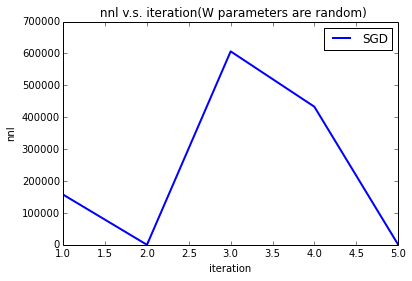

In [6]:
# all parameters are initialized to be zero; 
x = T.matrix("x")
y = T.matrix("y")

#w = theano.shared(np.zeros((n_genes,1)), name="w")
w = theano.shared(np.random.rand(n_genes,1), name="w")

# initialize the bias term
b = theano.shared(0., name="b")

l = T.dot(x, w) + b
p = T.nnet.sigmoid(l)
nnl = T.mean(-y * T.log(p) - (1-y) * T.log(1-p))

gw, gb = T.grad(nnl, [w, b])   

              
# Compile
learning_rate = 1e-2  #0.1  # #
updates = [(w, w - learning_rate * gw), (b, b - learning_rate * gb)]

index = T.lscalar()
train_model = theano.function(
    inputs=[index],
    outputs=nnl,
    updates=updates,
    givens={
        x: train_set_x[index * batch_size: (index + 1) * batch_size],
        y: train_set_y[index * batch_size: (index + 1) * batch_size]
        }
)

# Train
training_steps = np.arange(1, 50)
nnls = np.zeros(len(training_steps))
for i, d in enumerate(training_steps):
    err = train_model(i)
    nnls[i] = np.mean(err)
#print nnls

plt.title(' nnl v.s. iteration(W parameters are random)')
pl.plot(training_steps, nnls, lw=2, label = 'SGD')
pl.legend()
pl.xlabel('iteration')
pl.ylabel('nnl')

pl.show()

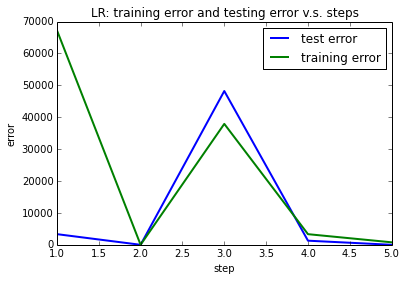

In [7]:
# conduct 10-fold cross validatin
from sklearn.cross_validation import KFold
n_folds = 10
#10 fold cross-validation
kf = KFold(100, n_folds=n_folds)

training_steps = np.arange(1, 50)
avg_train_err = np.zeros(len(training_steps))
avg_test_err = np.zeros(len(training_steps))
for i, d in enumerate(training_steps):
    train_errors = np.zeros(n_folds)
    test_errors = np.zeros(n_folds)
    index = 0
    for train_index, test_index in kf:
        X_train, X_test = train_set_x[train_index], train_set_x[test_index]
        y_train, y_test = train_set_y[train_index], train_set_y[test_index]

        cost_val  = train_model(i)
        train_errors[index] = np.mean(cost_val)           
        
        cost_val  = train_model(i)
        test_errors[index] = np.mean(cost_val)  
        index += 1
    avg_train_err[i] = np.mean(train_errors)
    avg_test_err[i] = np.mean(test_errors)

#print avg_train_err
#print avg_test_err

plt.title('LR: training error and testing error v.s. steps')
pl.plot(training_steps, avg_test_err, lw=2, label = 'test error')
pl.plot(training_steps, avg_train_err, lw=2, label = 'training error')
pl.legend()
pl.xlabel('step')
pl.ylabel('error')

pl.show()

0 0.0828523313292
('w is', 12533, 12532)
1 0.426863417478
('w is', 12533, 12532)
2 0.480481612878
('w is', 12533, 12533)
3 0.553238938224
('w is', 12533, 12533)
4 0.573999777386
('w is', 12533, 12533)
[ 0.08285233  0.42686342  0.48048161  0.55323894  0.57399978]


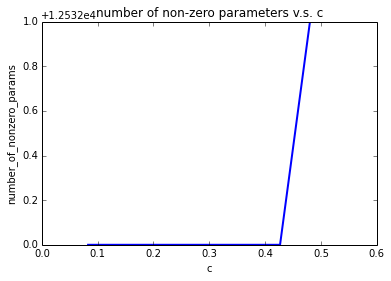

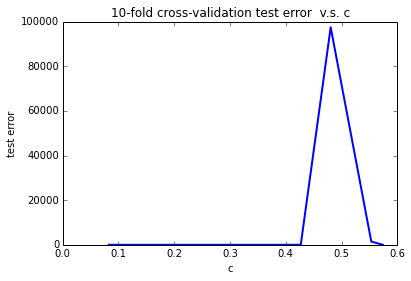

In [8]:
#Add L1-regularization to your model

# -number of non-zero parameters v.s. c
#- 10-fold cross-validation test error v.s. c 

# all parameters are initialized to be zero; 
x = T.matrix("x")
y = T.matrix("y")

w = theano.shared(np.zeros((n_genes,1)), name="w")
#w = theano.shared(np.random.rand(n_genes,1), name="w")

# initialize the bias term
b = theano.shared(0., name="b")

l = T.dot(x, w) + b
p = T.nnet.sigmoid(l)
nnl = T.mean(-y * T.log(p) - (1-y) * T.log(1-p))

             
# Compile
learning_rate = 1e-2  #0.1  # #
updates = [(w, w - learning_rate * gw), (b, b - learning_rate * gb)]

c_interation = np.sort(np.random.rand(5)[::-1]) #np.arange(1, 10)
avg_test_err = np.zeros(len(c_interation))
number_of_nonzero_params = np.zeros(len(c_interation))
learning_rate = 1e-2  #0.1  # #  

for i, d in enumerate(c_interation):
    print i,d
    

    nnl_opt = nnl + d * (w ** 2).sum()   
    gw, gb = T.grad(nnl_opt, [w, b])   
     
    updates = [(w, w - learning_rate * gw), (b, b - learning_rate * gb)]

    index = T.lscalar()
    train_model = theano.function(
        inputs=[index],
        outputs=nnl,
        updates=updates,
        givens={
            x: train_set_x[index * batch_size: (index + 1) * batch_size],
            y: train_set_y[index * batch_size: (index + 1) * batch_size]
            }
    )      
    
    
    test_errors = np.zeros(n_folds)
    index = 0
    for train_index, test_index in kf:
        X_train, X_test = train_set_x[train_index], train_set_x[test_index]
        y_train, y_test = train_set_y[train_index], train_set_y[test_index]     
        
        cost_val  = train_model(i)
        test_errors[index] = np.mean(cost_val)  
        index += 1
    avg_test_err[i] = np.mean(test_errors)
    
    print('w is', len(w.get_value()), len((w.get_value().nonzero())[0]))
    #print("b is %s", b.get_value())
    
    number_of_nonzero_params[i] = len((w.get_value().nonzero())[0])



print c_interation

plt.title('number of non-zero parameters v.s. c')
pl.plot(c_interation, number_of_nonzero_params, lw=2, label = 'number_of_nonzero_params')
#pl.legend()
pl.xlabel('c')
pl.ylabel('number_of_nonzero_params')
pl.show()

plt.title('10-fold cross-validation test error  v.s. c')
pl.plot(c_interation, avg_test_err, lw=2, label = 'test error')
#pl.legend()
pl.xlabel('c')
pl.ylabel('test error')

pl.show()